# Data mining

We will use Pandas, Numpy, Scikit and matplotlib libraries for this problem:

In [1]:
from copy import deepcopy
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=3)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Load the dataset and show it's first 5 rows:

In [2]:
data = pd.read_csv("NBAstats.csv", index_col="Player")
data.head()

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
Player,,,,,,,,,,,,,,,,,,,,,
Quincy Acy,PF,25,SAC,59,29,14.8,2.0,3.6,0.556,0.3,...,0.735,1.1,2.1,3.2,0.5,0.5,0.4,0.5,1.7,5.2
Jordan Adams,SG,21,MEM,2,0,7.5,1.0,3.0,0.333,0.0,...,0.600,0.0,1.0,1.0,1.5,1.5,0.0,1.0,1.0,3.5
Steven Adams,C,22,OKC,80,80,25.2,3.3,5.3,0.613,0.0,...,0.582,2.7,3.9,6.7,0.8,0.5,1.1,1.1,2.8,8.0
Arron Afflalo,SG,30,NYK,71,57,33.4,5.0,11.3,0.443,1.3,...,0.840,0.3,3.4,3.7,2.0,0.4,0.1,1.2,2.0,12.8
Alexis Ajinca,C,27,NOP,59,17,14.6,2.5,5.3,0.476,0.0,...,0.839,1.3,3.3,4.6,0.5,0.3,0.6,0.9,2.3,6.0


## Problem 1

<i>The dataset provided for this problem NBAstats.csv is stats from NBA players. The players are indexed by their names, and they are labeled by 5 different positions: {center (C), power forward (PF), small forward (SF), shooting guard (SG), point guard (PG)} and there are 27 attributes, e.g., age, team, games, games started, minutes played and so on (that makes total of 29 columns in the data matrix). Make sure that you standardize the data (zero-mean and standard deviation = 1) before you analyze the data.</i>

<i>1. Write a function cluster = mykmeans(X, k) that clusters data X ∈ Rn×p (n number of objects and p number of attributes) into k clusters.</i>

Implementation of k-means algorithm:

In [3]:
def mykmeans(X, k):
    # Choose k random points from the dataset as inital centroids
    centroids = X[np.random.randint(len(X), size=k)]
    # Array for storing previous centroids
    centroids_old = np.zeros(centroids.shape)
    # Array for clusters
    clusters = np.zeros(len(X), dtype=np.int8)
    # Loop untill centers stop changing
    while np.linalg.norm(centroids - centroids_old) > 0.0001:
        for i in range(len(X)):
            # calculate distances between the datapoint and centroids
            distances = np.linalg.norm(X[i]-centroids, axis=1)
            # Asign datapoint to cluster
            clusters[i] = np.argmin(distances)
        # Save previous centroids
        centroids_old = deepcopy(centroids)
        # Update centroids
        for i in range(k):
            points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
            centroids[i] = np.mean(points, axis=0)
    return clusters, centroids

Create a new dataset that contains all columns except "Tm" and "Pos":

In [4]:
cols = list(data.columns)
cols.remove('Tm')
cols.remove('Pos')
data1 = data[cols]
data1.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
Player,,,,,,,,,,,,,,,,,,,,,
Quincy Acy,25,59,29,14.8,2.0,3.6,0.556,0.3,0.8,0.388,...,0.735,1.1,2.1,3.2,0.5,0.5,0.4,0.5,1.7,5.2
Jordan Adams,21,2,0,7.5,1.0,3.0,0.333,0.0,0.5,0.000,...,0.600,0.0,1.0,1.0,1.5,1.5,0.0,1.0,1.0,3.5
Steven Adams,22,80,80,25.2,3.3,5.3,0.613,0.0,0.0,0.000,...,0.582,2.7,3.9,6.7,0.8,0.5,1.1,1.1,2.8,8.0
Arron Afflalo,30,71,57,33.4,5.0,11.3,0.443,1.3,3.4,0.382,...,0.840,0.3,3.4,3.7,2.0,0.4,0.1,1.2,2.0,12.8
Alexis Ajinca,27,59,17,14.6,2.5,5.3,0.476,0.0,0.0,0.000,...,0.839,1.3,3.3,4.6,0.5,0.3,0.6,0.9,2.3,6.0


Standardize the data before analyzis:

In [5]:
data1_scaled = scaler.fit_transform(data1)

<i>2. For this problem, use all features except team. Use your code to group the players into k = {3,5} clusters. Report the centers found for each clusters for each k, distribution of positions in each cluster and your brief observation.</i>

Now we can try to group the players into 3 and 5 clusters:

In [6]:
clusters1_3, centroids1_3 = mykmeans(data1_scaled, 3)
clusters1_5, centroids1_5 = mykmeans(data1_scaled, 5)

Lets take a look at centroids:

In [7]:
print('3 centroids:\n', centroids1_3)
print('5 centroids:\n', centroids1_5)

3 centroids:
 [[-0.055 -0.957 -0.772 -1.06  -0.937 -0.914 -0.342 -0.547 -0.553 -0.287
  -0.863 -0.857 -0.323 -0.374 -0.707 -0.713 -0.332 -0.557 -0.822 -0.783
  -0.59  -0.744 -0.496 -0.791 -0.941 -0.914]
 [-0.121  0.619  1.315  1.316  1.506  1.493  0.208  0.699  0.728  0.249
   1.465  1.494  0.153  0.156  1.391  1.379  0.273  0.647  1.144  1.047
   1.113  1.127  0.714  1.37   0.876  1.505]
 [ 0.1    0.443 -0.033  0.189  0.003 -0.009  0.164  0.088  0.079  0.103
  -0.034 -0.053  0.176  0.214 -0.119 -0.11   0.126  0.121  0.087  0.104
  -0.077  0.035  0.042 -0.044  0.307 -0.014]]
5 centroids:
 [[-0.033  0.632  1.27   1.347  1.481  1.578 -0.028  1.261  1.287  0.542
   1.209  1.302  0.025  0.095  1.477  1.338  0.497 -0.042  0.69   0.491
   1.469  1.308  0.012  1.503  0.644  1.576]
 [-0.648 -2.027 -0.873 -1.321 -1.337 -1.104 -3.631 -0.493 -0.465 -0.63
  -1.348 -1.142 -4.212 -3.818 -1.024 -1.054 -3.211 -0.706 -1.228 -1.133
  -0.72  -0.666 -0.873 -1.258 -1.275 -1.268]
 [-0.205  0.555  0.881  0.7

Because initial centroids are chosen by random, the k-means algorithm can be impacted by randomness. To check it, we can just run it a few more times and take a look at centroids:

In [8]:
clusters1_3, centroids1_3 = mykmeans(data1_scaled, 3)
print('3 centroids (1):\n', centroids1_3)
clusters1_3, centroids1_3 = mykmeans(data1_scaled, 3)
print('3 centroids (2):\n', centroids1_3)
clusters1_5, centroids1_5 = mykmeans(data1_scaled, 5)
print('5 centroids (1):\n', centroids1_5)
clusters1_5, centroids1_5 = mykmeans(data1_scaled, 5)
print('5 centroids (2):\n', centroids1_5)

3 centroids (1):
 [[ 0.018 -0.447 -0.623 -0.659 -0.667 -0.61  -0.412 -0.211 -0.202  0.058
  -0.687 -0.661 -0.317 -0.32  -0.558 -0.582 -0.051 -0.567 -0.647 -0.658
  -0.357 -0.485 -0.49  -0.528 -0.618 -0.641]
 [-0.04   0.276  0.054 -0.007 -0.044 -0.26   1.014 -0.745 -0.797 -0.764
   0.248  0.095  0.748  0.651 -0.063  0.095 -0.359  1.105  0.559  0.769
  -0.427 -0.202  0.853 -0.175  0.548 -0.139]
 [-0.003  0.614  1.096  1.206  1.246  1.299  0.015  0.924  0.944  0.447
   1.072  1.134  0.035  0.11   1.062  0.991  0.353  0.232  0.774  0.642
   0.958  1.029  0.274  1.088  0.729  1.268]]
3 centroids (2):
 [[ 0.016 -0.439 -0.621 -0.647 -0.658 -0.604 -0.378 -0.201 -0.192  0.049
  -0.681 -0.657 -0.282 -0.285 -0.554 -0.577 -0.066 -0.567 -0.645 -0.657
  -0.347 -0.475 -0.489 -0.524 -0.609 -0.632]
 [-0.016  0.635  1.122  1.208  1.27   1.32   0.025  0.918  0.944  0.434
   1.102  1.16   0.053  0.111  1.11   1.038  0.389  0.231  0.791  0.654
   0.998  1.059  0.24   1.138  0.693  1.296]
 [-0.02   0.289  0

Because of randomness involved in initiation of centroids in k-means algorithm, we can get different centroids each time we use this algorithm. To measure impact of random, we can run the k-means a few times and then calculate average minimal distance between centroids from different runs. The greater the influence of randomness, the greater the distance between centroids will be.

In [9]:
def test_kmeans(X, k, trials):
    centroids1 = mykmeans(X, k)[1]
    dist_sum = 0
    for i in range(trials):
        centroids = mykmeans(X, k)[1]
        distances = [np.linalg.norm(np.concatenate((centroids[j:], centroids[0:j])), axis=1).mean() for j in range(k)]
        dist_sum += min(distances)
    return dist_sum/trials

In [10]:
test_kmeans(data1_scaled, 3, 20)

3.3738452634704053

In [11]:
test_kmeans(data1_scaled, 5, 20)

4.015210357188101

It's easy to see that we keep getting different centroids each time we run the k-means, so in this case there is huge impact of random. From this we can conclude that the given dataset can not be clusterized well. The reason of this can be that dataset contains redundant fetures which create noise in the data.

<i>3. Some of the attributes are perhaps redundant in terms of Linear Algebra. Report which ones are redundant and explain why.</i>

To analyze impact of attributes on clusterization, we can use univariate selection to find those features that have the strongest relationship with the clusterization that we want to achieve. In this case, we want to divide players into clusters and compare those clusters to positions of players.
To perform univariate selection, we can use SelectKBest class from scikit-learn.

In [12]:
from sklearn.feature_selection import SelectKBest

test = SelectKBest()
select = test.fit(data1, data['Pos'])
scores = {data1.columns[i]: select.scores_[i] for i in range(len(select.scores_))}
scores

{'2P': 2.726578837908756,
 '2P%': 11.528762210547479,
 '2PA': 1.5746699823373838,
 '3P': 40.4192522089193,
 '3P%': 39.65419609710983,
 '3PA': 49.15069535694824,
 'AST': 53.932264732177,
 'Age': 0.6378563107414957,
 'BLK': 48.613672126149574,
 'DRB': 17.325312810779142,
 'FG': 0.9967234596557175,
 'FG%': 36.874719487677275,
 'FGA': 4.5484464275130865,
 'FT': 1.5261559645045448,
 'FT%': 6.4527884026407625,
 'FTA': 1.3473235673225987,
 'G': 0.34560449717897684,
 'GS': 0.35543849865659394,
 'MP': 3.7131042629977244,
 'ORB': 68.76029951926401,
 'PF': 4.7320219644673625,
 'PS/G': 2.365001959590276,
 'STL': 13.64103503164915,
 'TOV': 13.565597972414295,
 'TRB': 30.970641979746716,
 'eFG%': 9.19774321759613}

<i>4. For this problem, use the following set of attributes {2P%, 3P%, FT%, TRB, AST, STL, BLK} to perform k-means clustering with k = {3,5}. Report the centers found for each clusters for each k, distribution of positions in each cluster and your brief observation.</i>

Now we can try to use only part of features:

In [13]:
cols = ['2P%', '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK']
data2 = data[cols]
data2_scaled = scaler.fit_transform(data2)
clusters2_3, centroids2_3 = mykmeans(data2_scaled, 3)
clusters2_5, centroids2_5 = mykmeans(data2_scaled, 5)
print('3 centroids:\n', centroids2_3)
print('5 centroids:\n', centroids2_5)

3 centroids:
 [[-0.292  0.309  0.078 -0.536 -0.335 -0.417 -0.47 ]
 [ 0.086  0.49   0.336  0.673  1.112  1.214  0.224]
 [ 0.655 -1.436 -0.634  0.543 -0.545 -0.46   0.945]]
5 centroids:
 [[ 0.555 -0.765 -0.36   1.792 -0.118  0.24   2.041]
 [ 0.066 -1.346 -1.236 -0.397 -0.718 -0.759 -0.103]
 [ 0.014  0.521  0.472  0.461  2.264  1.673  0.043]
 [-0.313  0.285  0.36  -0.702 -0.492 -0.715 -0.549]
 [ 0.072  0.47   0.201  0.069  0.157  0.459 -0.188]]


Lets try once more:

In [24]:
clusters2_3, centroids2_3 = mykmeans(data2_scaled, 3)
clusters2_5, centroids2_5 = mykmeans(data2_scaled, 5)
print('3 centroids:\n', centroids2_3)
print('5 centroids:\n', centroids2_5)

3 centroids:
 [[ 0.776 -1.215 -0.514  1.111 -0.4   -0.232  1.433]
 [ 0.024  0.509  0.354  0.434  1.076  1.153  0.014]
 [-0.25   0.111 -0.024 -0.563 -0.43  -0.521 -0.446]]
5 centroids:
 [[-1.694e-02  5.503e-01  2.769e-01 -1.108e-01  8.497e-02  2.003e-01
  -2.849e-01]
 [ 5.966e-01 -1.125e+00 -3.878e-01  1.380e+00 -3.244e-01 -9.820e-02
   1.628e+00]
 [ 2.520e-02  4.533e-01  4.028e-01  6.335e-01  1.913e+00  1.736e+00
   2.217e-01]
 [ 3.279e-02 -3.697e-01  4.503e-02 -7.019e-01 -6.661e-01 -8.657e-01
  -4.551e-01]
 [-2.824e+00 -3.723e-04 -3.444e+00 -1.047e+00 -8.376e-01 -8.225e-01
  -7.057e-01]]


In [15]:
test_kmeans(data2_scaled, 3, 20)

1.8200022295142708

In [19]:
test_kmeans(data2_scaled, 5, 20)

2.408225311302254

This time,  we are still getting different centroids with each run, but now centroids from each run are much closer to each other. It means that removal of unimportant fetures helped to make clusterization more efficient.  
Lets compare clusters from last clusterization with k={3,5} and positions of players. To do this, we can count how often positions apear in each cluster and then compute probabilities.

In [25]:
pos_clusters = {pos:{i:0 for i in range(3)} for pos in set(data['Pos'])}
for i in range(len(clusters2_3)):
    pos_clusters[data['Pos'][i]][clusters2_3[i]] += 1
pos_clusters

{'C': {0: 55, 1: 5, 2: 29},
 'PF': {0: 22, 1: 18, 2: 63},
 'PG': {0: 0, 1: 47, 2: 48},
 'SF': {0: 3, 1: 30, 2: 59},
 'SG': {0: 0, 1: 34, 2: 62}}

In [26]:
s = [0 for i in range(3)]
for pos in pos_clusters:
    for i in pos_clusters[pos]:
        s[i] += pos_clusters[pos][i]
for pos in pos_clusters:
    for i in pos_clusters[pos]:
        pos_clusters[pos][i] /= s[i]
        pos_clusters[pos][i] = round(pos_clusters[pos][i], 4)
pos_clusters

{'C': {0: 0.6875, 1: 0.0373, 2: 0.1111},
 'PF': {0: 0.275, 1: 0.1343, 2: 0.2414},
 'PG': {0: 0.0, 1: 0.3507, 2: 0.1839},
 'SF': {0: 0.0375, 1: 0.2239, 2: 0.2261},
 'SG': {0: 0.0, 1: 0.2537, 2: 0.2375}}

In [27]:
pos_clusters = {pos:{i:0 for i in range(5)} for pos in set(data['Pos'])}
for i in range(len(clusters2_5)):
    pos_clusters[data['Pos'][i]][clusters2_5[i]] += 1
pos_clusters

{'C': {0: 7, 1: 48, 2: 3, 3: 31, 4: 0},
 'PF': {0: 36, 1: 21, 2: 4, 3: 37, 4: 5},
 'PG': {0: 45, 1: 0, 2: 30, 3: 18, 4: 2},
 'SF': {0: 44, 1: 2, 2: 11, 3: 29, 4: 6},
 'SG': {0: 58, 1: 0, 2: 11, 3: 24, 4: 3}}

In [28]:
s = [0 for i in range(5)]
for pos in pos_clusters:
    for i in pos_clusters[pos]:
        s[i] += pos_clusters[pos][i]
for pos in pos_clusters:
    for i in pos_clusters[pos]:
        pos_clusters[pos][i] /= s[i]
        pos_clusters[pos][i] = round(pos_clusters[pos][i], 4)
pos_clusters

{'C': {0: 0.0368, 1: 0.6761, 2: 0.0508, 3: 0.223, 4: 0.0},
 'PF': {0: 0.1895, 1: 0.2958, 2: 0.0678, 3: 0.2662, 4: 0.3125},
 'PG': {0: 0.2368, 1: 0.0, 2: 0.5085, 3: 0.1295, 4: 0.125},
 'SF': {0: 0.2316, 1: 0.0282, 2: 0.1864, 3: 0.2086, 4: 0.375},
 'SG': {0: 0.3053, 1: 0.0, 2: 0.1864, 3: 0.1727, 4: 0.1875}}

We succesfully divided players into 3 and 5 clusters. Our clusters do not fully match distribution of positions of players. But there seems to be some relationship between k-means clusterization and positions of players.  
For example, when the number of clusters k=3, we can conclude that if the player was assigned to cluster 1, then it's less likely that this player takes a position in center or in power forward. If the player was assigned to cluster 0, it's most likely that this player takes a position in center and almost definitely that this player does not take a position in small forward, shooting guard or point guard.  
When the number of clusters k=5, then if the player belongs to cluster 1, there is 37.5% probability that this player takes position in small forward and 0% probability for center position. If player's cluster is 1, we can almost definitely say that this player does not take position in small forward, shooting guard or point guard. If player's cluster is 2, there is 50% probability that this player takes position in point guard.

## Problem 2

<i>1. Write a function class = myknn(X, test, k) that performs k-nearest neighbor (k-NN) classification where X ∈Rn×p (n number of objects and p number of attributes) is training data, test is testing data, and k is a user parameter.</i>

Implementation of the K nearest neighbors algorithm:

In [29]:
def get_neighbors(X, test_inst, k, labels):
    distances = []
    for i in range(len(X)):
        # Calculate distances from test point to each point of train set
        dist = np.linalg.norm(test_inst-X[i])
        distances.append((X[i], dist, labels[i]))
    distances.sort(key=lambda x: x[1])
    # Get k nearest train points to the datapoint
    neighbors = distances[:k]
    return neighbors

In [30]:
def myknn(X, test, k, labels):
    res = []
    # For each point in test set, assign label based on it's neighbors
    for i in range(len(test)):
        counter = Counter()
        neighbors = get_neighbors(X, test[i], k, labels)
        for n in neighbors:
            counter[n[2]] += 1
        res.append(counter.most_common(1)[0][0])
    return res

Function to measure accuracy of the K nearest neighbors algorithm:

In [31]:
def accuracy_myknn(knn_labels, orig_labels):
    return sum([1 for i in range(len(knn_labels)) 
                if knn_labels[i]==orig_labels[i]])/len(knn_labels)

<i>2. For this problem, use all features except team. Use your k-NN code to perform classification.
Set k = {1,5,10,30} and report their accuracies and your observation.</i>

Split data into train and test sets and run the algorithm for k={1,5,10,30}:

In [32]:
train_data1 = data1_scaled[:375]
test_data1 = data1_scaled[375:]
test_labels = data['Pos'][375:]

knn_labels1_1 = myknn(train_data1, test_data1, 1, data['Pos'])
knn_labels1_5 = myknn(train_data1, test_data1, 5, data['Pos'])
knn_labels1_10 = myknn(train_data1, test_data1, 10, data['Pos'])
knn_labels1_30 = myknn(train_data1, test_data1, 30, data['Pos'])

Now we can measure accuracy for each value of k:

In [33]:
accuracy_myknn(knn_labels1_1, test_labels)

0.51

In [34]:
accuracy_myknn(knn_labels1_5, test_labels)

0.53

In [35]:
accuracy_myknn(knn_labels1_10, test_labels)

0.52

In [36]:
accuracy_myknn(knn_labels1_30, test_labels)

0.56

It seems like with increasing number of neighbors, we are getting better accuracy. Maximum accuracy that was reached is 56% when the number of neighbors is 30.

Also we can calculate accuracies for all numbers of neighbors from 1 to 50 and find out what number of neighbors can give us best accuracy:

In [37]:
test = [accuracy_myknn(myknn(train_data1, test_data1, i, data['Pos']), test_labels) for i in range(1,50)]

In [38]:
max(test)

0.57

In [39]:
test.index(max(test))

18

Lets visualize the dependency of accuracy from number of neighbors:

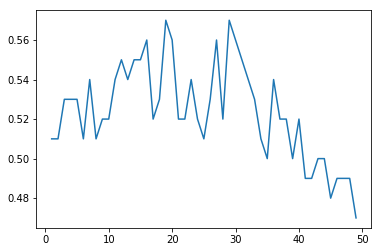

In [40]:
plt.plot(range(1,50), test)
plt.show()

We were able to reach maximum accuracy of 57% when number of neighbors is 18.  
There is no visible dependency of accuracy from number of neighbors, except that with number of neighbors bigger than 30 accuracy begins to fall down.

<i>3. For this problem, use the following set of attributes {2P%, 3P%, FT%, TRB, AST, STL, BLK} to perform k-NN classification with k = {1,5,10,30}. Report accuracies for each k and your observation.</i>

Now we can try to use the algorithm on reduced dataset:

In [41]:
train_data2 = data2_scaled[:375]
test_data2 = data2_scaled[375:]
knn_labels2_1 = myknn(train_data2, test_data2, 1, data['Pos'])
knn_labels2_5 = myknn(train_data2, test_data2, 5, data['Pos'])
knn_labels2_10 = myknn(train_data2, test_data2, 10, data['Pos'])
knn_labels2_30 = myknn(train_data2, test_data2, 30, data['Pos'])

In [42]:
accuracy_myknn(knn_labels2_1, test_labels)

0.52

In [43]:
accuracy_myknn(knn_labels2_5, test_labels)

0.59

In [44]:
accuracy_myknn(knn_labels2_10, test_labels)

0.58

In [45]:
accuracy_myknn(knn_labels2_30, test_labels)

0.63

It seems that for the K nearest neighbor algorithm, removal of unimportant features helped to improve accuracy of predictions. Maximum accuracy that was reached is 63% when the number of neighbors is 30.

Now lets calculate accuracies for all numbers of neighbors from 1 to 50 and find out what number of neighbors gives best accuracy:

In [46]:
test = [accuracy_myknn(myknn(train_data2, test_data2, i, data['Pos']), test_labels) for i in range(1,50)]

In [47]:
max(test)

0.66

In [48]:
test.index(max(test))

21

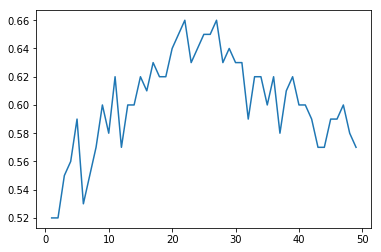

In [49]:
plt.plot(range(1,50), test)
plt.show()

We were able to reach maximum accuracy of 66% when number of neighbors is 21.  
There is consistent growth of accuracy with increasing number of neigbors untill peak is reached at 21-25 neighbors. After this peak accuracy begins to fall down.